This code is written by ChatGPT and the source is unkown for now.

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [22]:
# Generator
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Tanh()
        )
    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)

In [23]:
# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img.view(img.size(0), -1))

In [24]:
# Hyperparameters
latent_dim = 100
batch_size = 64
epochs = 20
learning_rate = 0.0002

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

dataset = datasets.MNIST(root='data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [25]:
# Initialize models
generator = Generator(latent_dim)
discriminator = Discriminator()

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate)

# Loss function (Binary Cross-Entropy)
criterion = nn.BCELoss()

# Training loop
for epoch in range(epochs):
    for real_imgs, _ in dataloader:
        # Create labels
        real_labels = torch.ones((real_imgs.size(0), 1))  # Real images = 1
        fake_labels = torch.zeros((real_imgs.size(0), 1))  # Fake images = 0

        # Train Discriminator
        optimizer_D.zero_grad()
        z = torch.randn(real_imgs.size(0), latent_dim)  # Random noise
        fake_imgs = generator(z)
        real_loss = criterion(discriminator(real_imgs), real_labels)
        fake_loss = criterion(discriminator(fake_imgs.detach()), fake_labels)
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(real_imgs.size(0), latent_dim)
        fake_imgs = generator(z)
        g_loss = criterion(discriminator(fake_imgs), real_labels)  # Trick D into thinking fake is real
        g_loss.backward()
        optimizer_G.step()

    # Print losses
    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

Epoch [1/20] | D Loss: 0.0688 | G Loss: 6.4810
Epoch [2/20] | D Loss: 0.6464 | G Loss: 1.9441
Epoch [3/20] | D Loss: 0.4994 | G Loss: 1.9092
Epoch [4/20] | D Loss: 0.3457 | G Loss: 3.5011
Epoch [5/20] | D Loss: 0.4920 | G Loss: 3.1623
Epoch [6/20] | D Loss: 0.6681 | G Loss: 3.1003
Epoch [7/20] | D Loss: 0.1221 | G Loss: 4.6406
Epoch [8/20] | D Loss: 0.4963 | G Loss: 2.1985
Epoch [9/20] | D Loss: 0.1738 | G Loss: 5.3080
Epoch [10/20] | D Loss: 0.2873 | G Loss: 3.6623
Epoch [11/20] | D Loss: 0.4770 | G Loss: 3.5055
Epoch [12/20] | D Loss: 0.3530 | G Loss: 2.6039
Epoch [13/20] | D Loss: 0.5475 | G Loss: 3.5885
Epoch [14/20] | D Loss: 0.1223 | G Loss: 4.2223
Epoch [15/20] | D Loss: 0.7135 | G Loss: 2.6684
Epoch [16/20] | D Loss: 0.3046 | G Loss: 4.2844
Epoch [17/20] | D Loss: 0.3465 | G Loss: 4.3135
Epoch [18/20] | D Loss: 0.3825 | G Loss: 3.8257
Epoch [19/20] | D Loss: 0.1405 | G Loss: 4.4137
Epoch [20/20] | D Loss: 0.2943 | G Loss: 2.5984


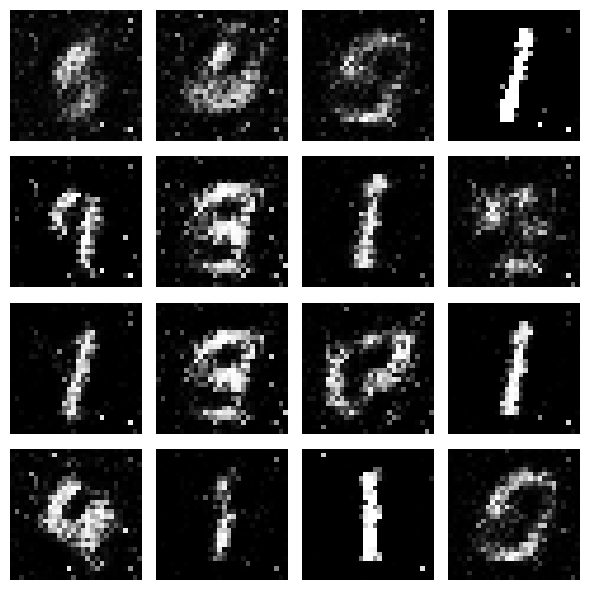

In [99]:
import matplotlib.pyplot as plt

generator.eval()
with torch.no_grad():
    z = torch.randn(16, latent_dim)
    generated_imgs = generator(z)

fig, axes = plt.subplots(4, 4, figsize=(6, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(generated_imgs[i].squeeze(), cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

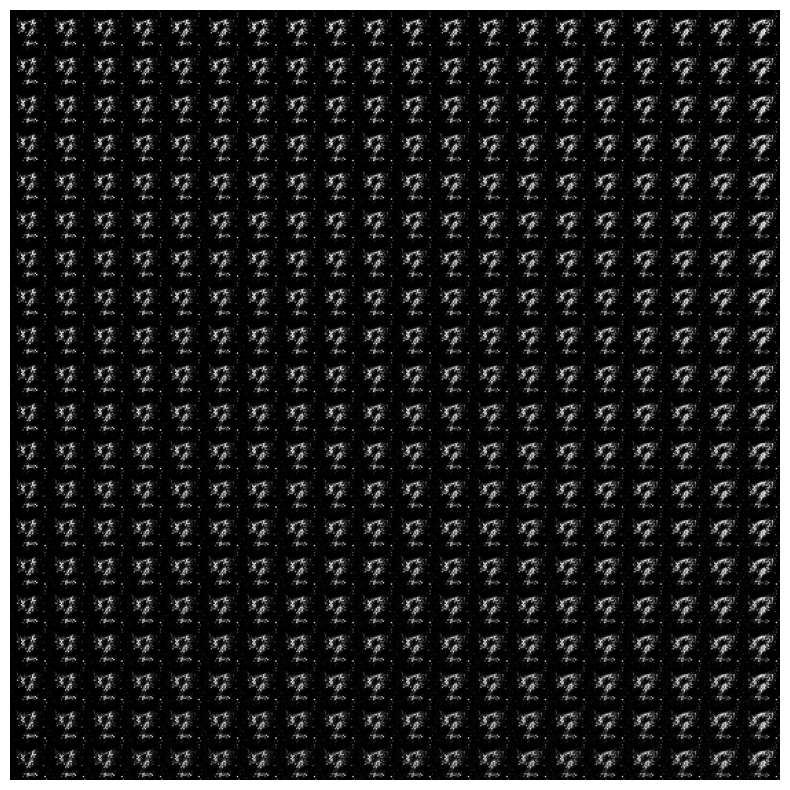

In [97]:
a=50
# Parameters
grid_size = 20  # Number of points along each axis
latent_dim = 100
img_dim = 28  # Assuming MNIST image size

# Create a 2D grid for the first two latent dimensions
u_range = np.linspace(0.01, 0.99, grid_size)  # Avoid 0 and 1 for numerical stability
z_coords = norm.ppf(u_range)  # Map uniform probabilities to Gaussian values
z_grid = np.array([[z1, z2] for z1 in z_coords for z2 in z_coords])

# Extend to 100-dimensional latent space
z_grid_extended = np.ones((grid_size**2, latent_dim))
z_grid_extended[:, a:a+2] = z_grid  # Set the first two dimensions
z_grid_tensor = torch.tensor(z_grid_extended, dtype=torch.float32)

# Generate images using the GAN generator
generator.eval()  # Put the generator in evaluation mode
with torch.no_grad():
    generated_images = generator(z_grid_tensor).cpu().numpy()

# Visualize the manifold
canvas = np.zeros((grid_size * img_dim, grid_size * img_dim))

for i, (z1, z2) in enumerate(z_grid):
    x = i % grid_size
    y = i // grid_size
    canvas[y * img_dim:(y + 1) * img_dim, x * img_dim:(x + 1) * img_dim] = generated_images[i].reshape(img_dim, img_dim)

plt.figure(figsize=(10, 10))
plt.imshow(canvas, cmap="gray")
plt.axis("off")
plt.show()